<!-- import sys;sys.path.append('../') -->

# EEW accuracy analysis
The following tutorial requires pyShake to be installed, see [the installation instructions][install].

## Read and Filter EEW solutions 
The [eew_report2dict][eew_report2dict]  function is first called with a file path pattern that points to text files in a specific directory. The function returns a dictionary, which is stored in the EEW solutions variable. The number of solutions and reports are then printed. The number of solutions is calculated by summing the lengths of the 'Lon.' lists in the EEW solutions dictionary, and the number of reports is simply the length of the EEWsolutions dictionary.

Then, the [reportfilter][reportfilter] function filters the EEW solutions based on the specified country code and distance threshold, removing duplicate locations and empty reports. The filtered solutions are stored back in the EEW solutions dictionary. The number of filtered solutions and reports are then printed, similar to before.

[eew_report2dict]: pyshake.html#pyshake.catalog.eew_report2dict
[reportfilter]: pyshake.html#pyshake.catalog.reportfilter
[install]: install.html#


In [1]:
countrycode = 'gt'
countryname = 'guatemala'
ref_catalog = ('USGS','us')

from pyshake.catalog import eew_report2dict, reportfilter

# Read EEW solutions
EEWsolutions = eew_report2dict(files='/Users/fred/Documents/Data/ATTAC/alert/insivumeh/example/*txt')
print('%d solutions %d reports'%(sum([len(EEWsolutions[s]['Lon.']) for s in EEWsolutions]),len(EEWsolutions)))

# Filter EEW solutions
EEWsolutions = reportfilter(EEWsolutions,countrycodes=countrycode,dthresh=1.5)
print('%d filtered solutions %d filtered reports'%(sum([len(EEWsolutions[s]['Lon.']) for s in EEWsolutions]),len(EEWsolutions)))

3761 solutions 117 reports
2826 filtered solutions 87 filtered reports


## Get reference catalog and Match EEW solutions 

The [getref][getref] function is called with the EEW solutions dictionary as an argument. This function retrieves a reference catalog of seismic events that cover the time-period and the area of the input catalog. The number of reports in EEW solutions and the number of references in reference catalog are then printed.

Then, the [matchreports][matchreports] function is called with the EEW solutions and reference solutions as arguments. This function compares the EEW reports with the reference catalog to find matching events. The matching events are determined based on the specified maximum hypocentral distance and origin time difference. The updated EEW solutions dictionary, which now includes the reference source parameters from the matching reference seismic events, is returned by the function and stored back in the EEW solutions variable.

[getref]: pyshake.html#pyshake.catalog.getref
[matchreports]: pyshake.html#pyshake.catalog.matchreports

In [2]:
from pyshake.catalog import getref, matchreports 

# Get  reference catalog
Refsolutions = getref(EEWsolutions)
print('%d reports %d references'%(len(EEWsolutions),len(Refsolutions)))

# Match EEW solutions and reference catalog
EEWsolutions = matchreports(EEWsolutions,Refsolutions)  

{'starttime': UTCDateTime(2022, 1, 15, 0, 40, 28), 'endtime': UTCDateTime(2023, 7, 8, 14, 50, 45), 'minlongitude': -94.95, 'maxlongitude': -85.91, 'minlatitude': 11.03, 'maxlatitude': 17.39, 'format': 'csv', 'filename': <_io.BytesIO object at 0x7fb8a8286810>}


87 reports 484 references
Similar origin times
193 reports with matching origin time
Similar origin locations
216 origin loc mismatchs


## Draw accuracy maps
The  [map][map] function generates a map of EEW reports and reference seismic events. It also supports all parameters related to the [alert_accuracy][alert_accuracy] function from the same module, which is used to classify the EEW reports into true positives, false positives, and false negatives based on the reference seismic events. 

The  [map][map] function is called with the EEW solutions and reference solutions dictionaries as arguments, along with several other parameters. The Mmin parameter is set to 5, as the minimum magnitude of the seismic events to be included in the map. The Lmin parameter is set to 0.4, as the minimum likelihood of the seismic events to be included in the map. The MMImin parameter is set to 4.5, as the minimum Modified Mercalli Intensity (MMI) of the seismic events to be included in the map. The MMIcountry parameter is set to countryname, as the name of the country for which the MMI values are considered. The Mtypes parameter is set to 'MVS', as  the types of magnitudes to be considered.

The  [map][map] function returns a Matplotlib axis object, which is stored in the ax variable. This object represents the plot of the EEW solutions and reference seismic events on a map. The map includes the locations of the seismic events, their magnitudes, and their likelihoods. It also includes a legend that indicates the types of magnitudes and the scale of the event sizes.

[alert_accuracy]:pyshake.html#pyshake.catalog.alert_accuracy
[map]:pyshake.html#pyshake.catalog.map

27/87 F+ and 425/87 F-


/Users/fred/Documents/Projects/SED-EEW/ATTAC/pyShake/docs/../pyshake/util.py:251: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  events[e].depth = event[2]
/opt/homebrew/anaconda3/envs/quake/lib/python3.8/site-packages/owslib/map/wms111.py:121: UserWarning: Content metadata for layer "GEBCO_LATEST_SUB_ICE_TOPO" already exists. Using child layer
  warnings.warn('Content metadata for layer "%s" already exists. Using child layer' % cm.id)
/opt/homebrew/anaconda3/envs/quake/lib/python3.8/site-packages/owslib/map/wms111.py:121: UserWarning: Content metadata for layer "GEBCO_LATEST" already exists. Using child layer
  warnings.warn('Content metadata for layer "%s" already exists. Using child layer' % cm.id)
/opt/homebrew/anaconda3/envs/quake/lib/python3.8/site-packages/owslib/map/wms111.py:121: UserWarning: Content metadata for layer "GEBCO_LATEST_2_sub_ice_topo" already exists. Using child layer
  war

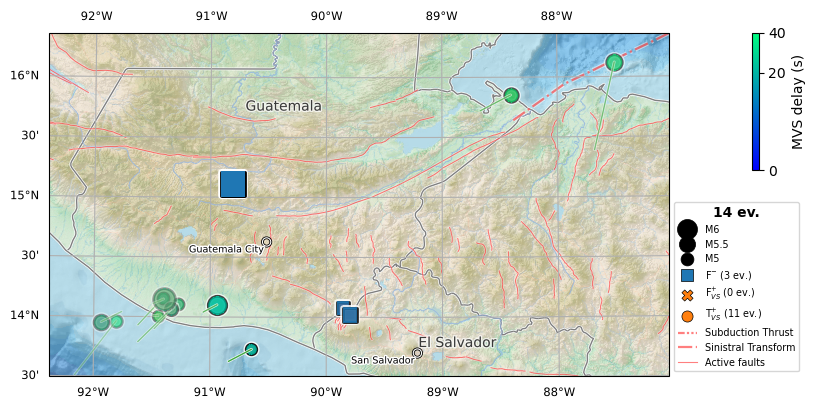

In [3]:

from pyshake.catalog import map 
ax = map(EEWsolutions,
        Refsolutions,
        Mmin=5,
        Lmin=0.4,
        MMImin=4.5, 
        MMIcountry=countryname,
        Mtypes='MVS',    
        )

## Get event informations

The [table][table] function generates a table of false events based on the EEW reports and reference seismic events. It supports all parameters related to the [alert_accuracy][alert_accuracy] function (from the same module), which is used to classify the EEW reports into true positives, false positives, and false negatives based on the reference seismic events.

The [table][table] function is called with the EEW solutions and reference solutions dictionaries as arguments, along with several other parameters as in the previous map. The [table][table] function returns a pandas DataFrame object, which represents the table of false events. The table includes the longitude, latitude, depth, magnitude, origin time, and EEW delay of the false events. The false events are classified into false positives and false negatives. False positives are EEW reports that do not match any reference seismic events, and false negatives are reference seismic events that do not match any EEW reports.

[table]:pyshake.html#pyshake.catalog.table
[alert_accuracy]:pyshake.html#pyshake.catalog.alert_accuracy

In [4]:
from pyshake.catalog import table 

table(EEWsolutions,
        Refsolutions,
        Mmin=5,
        Lmin=0.4,
        MMImin=4.5, 
        MMIcountry=countryname,
        Mtypes='MVS')

27/87 F+ and 425/87 F-


/Users/fred/Documents/Projects/SED-EEW/ATTAC/pyShake/docs/../pyshake/util.py:251: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  events[e].depth = event[2]


,Longitude,Latitude,Depth,Magnitude,Origin time,EEW delay
F-,-90.8052,15.1066,252.000,6.4,2023-05-17T23:02:29.919000Z,None
F-,-89.8596,14.0805,7.997,5.0,2023-01-16T04:47:42.256000Z,None
F-,-89.7977,14.0226,10.000,5.2,2023-01-15T23:08:23.815000Z,None
